# PDKit Library on Walking and Balance Tests

This notebook will explore some of the features that show some significance in differentiating between PD vs NON-PD patients. It will explore the features that is provided py the PDKit library.
The method of analyzing each features will be based on grouping recordIds from each healthCodes into one, to reduce variance between the features. Aggregation of each features will be based on maximum, median and mean of each features. After visualizing the data on RAW_EDA.ipynb, where I compared each features based on all of its vector coordinates (x, y, z, resultant).

## List of Features

- no_of_steps: Number of steps made during the test
- median_freeze_index: Median of the freeze index
- count_freeze_index: Number of how much the freeze index exceed 2.5
- speed_of_gait: Gait speed from the approximation made by wavelet coefficients
- gait_step_regularity: Measure of step regularity along axis (percentage of consistency of the step-to-step pattern
- gait_stride_regularity: Measure of stride regularity along axis (percentage of consistency of stride to stride pattern
- gait_symmetry: Measure of gait symmetry along axis (difference between step and stride regularity 

Term: 
Freeze Index: A measure of power in the high frequency band [3-8 Hz] divided by power in the low frequency band [0.5-3 Hz]. A higher freeze index will indicate that there are more energy available on the high frequency band, which denotes that there are higher frequency gait, which usually occurs during gait freezing. Thus, a freeze index higher than 2.5 will be considered as “freezing” occurrences, as noted from the documentation

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
sns.set_style("dark")

%matplotlib inline

## Analysis

In [6]:
walking_data = pd.read_csv(r"C:\Users\atedi\OneDrive\Documents\SageBionetworks\local_data\walking_data.csv", index_col=0)
balance_data = pd.read_csv(r"C:\Users\atedi\OneDrive\Documents\SageBionetworks\local_data\balance_data.csv", index_col=0)

In [15]:
def aggregate_func(data, gender):
    data = data[data["gender"] == gender]
    median_data = data.groupby("healthCode").median()
    mean_data = data.groupby("healthCode").mean()
    max_data = data.groupby("healthCode").max()
    min_data = data.groupby("healthCode").min()
    return median_data, mean_data, max_data, min_data

def plot_distribution(data):
    for i in [i for i in data.columns if "features" in i]:
        PD = data[data["PD"] == True][i].dropna()
        NONPD = data[data["PD"] == False][i].dropna()
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
        sns.distplot(PD, label = "PD", kde_kws={"shade": True}, hist = False, ax = axes[0])
        sns.distplot(NONPD, label = "NONPD", kde_kws={"shade": True}, hist = False, ax = axes[0])
        sns.boxplot(x = "PD", y = i, data = data, ax = axes[1], orient = "v", order = [True, False])
        axes[0].set_title("p-values: {}".format(ttest_ind(PD, NONPD)[1]))
        axes[0].grid()
        axes[1].grid()
        plt.show()

## 1a. Walking Median Groupings Male

In [ ]:
male_walking_median_data, male_walking_mean_data, male_walking_max_data, male_walking_min_data = aggregate_func(walking_data, "Male")

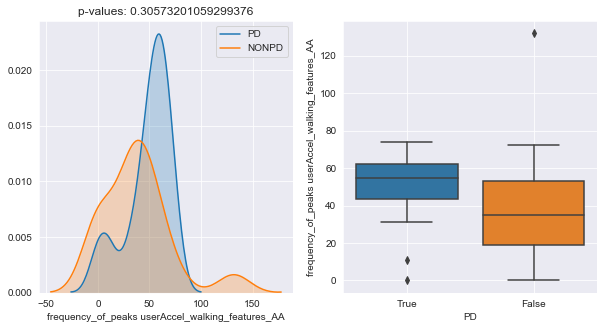

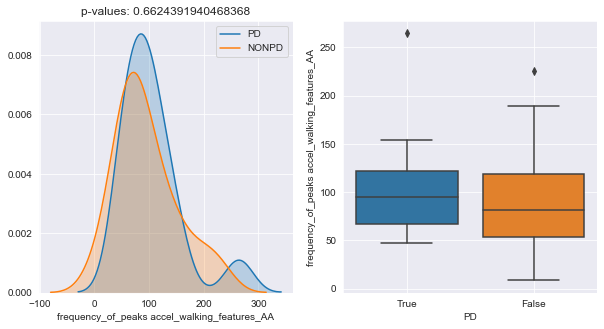

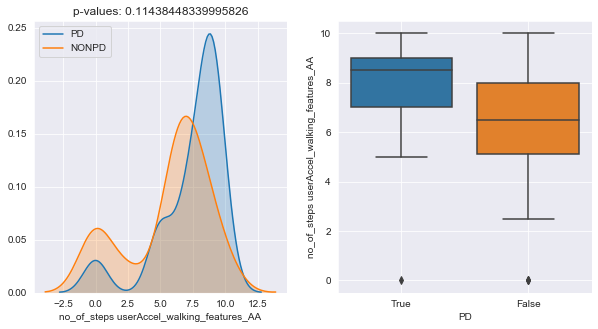

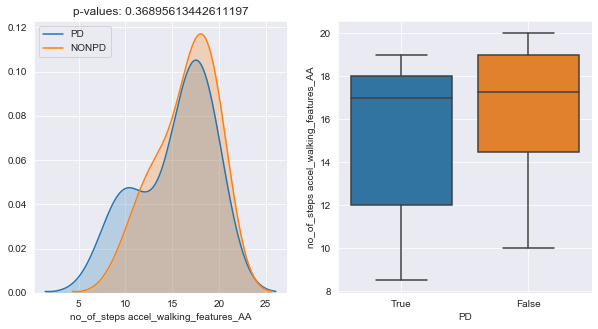

In [45]:
plot_distribution(male_walking_median_data[["frequency_of_peaks userAccel_walking_features_AA", "frequency_of_peaks accel_walking_features_AA",
                                            "no_of_steps userAccel_walking_features_AA", "no_of_steps accel_walking_features_AA", 
                                            "PD"]])

## 1b. Walking Mean Groupings Male

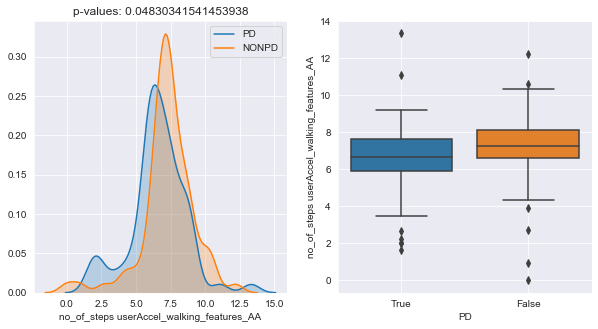

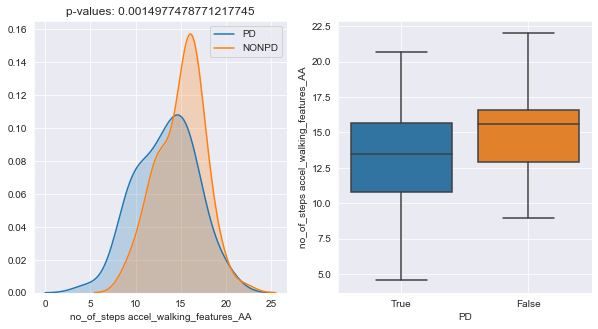

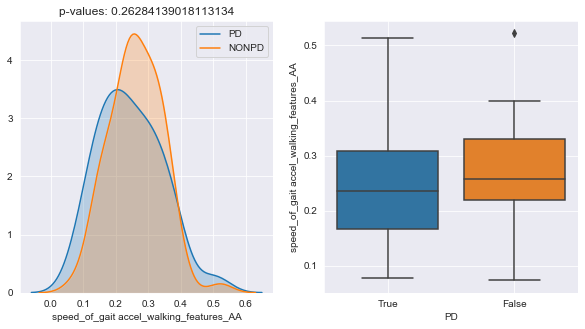

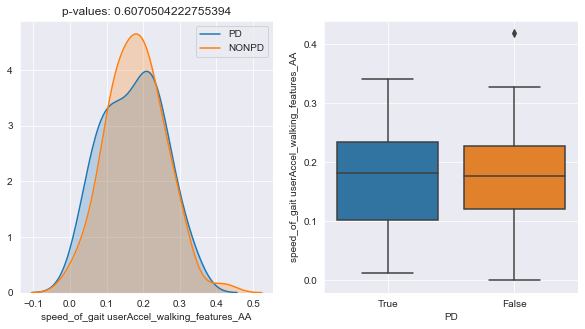

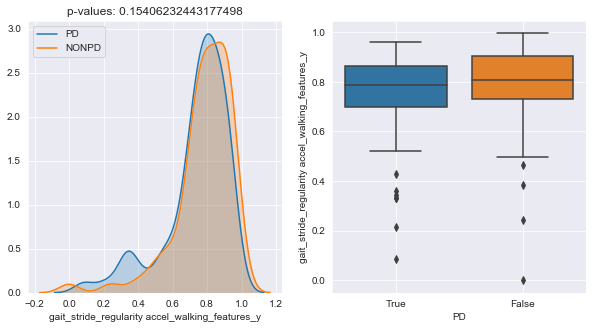

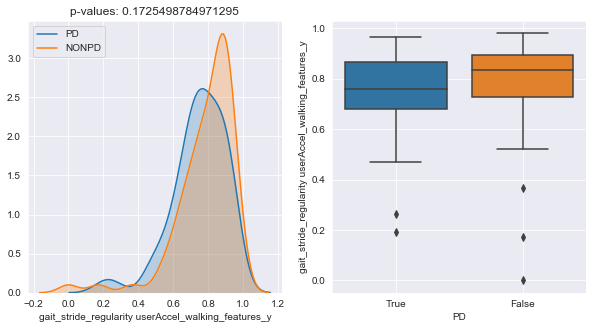

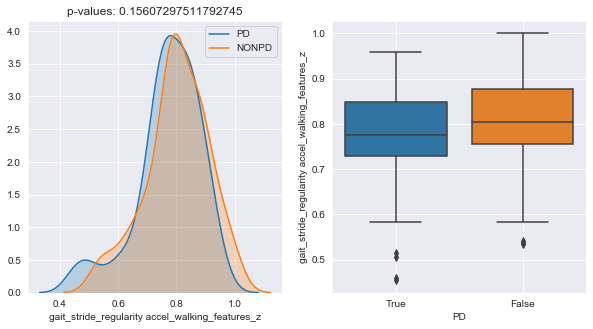

In [36]:
plot_distribution(male_walking_mean_data[["no_of_steps userAccel_walking_features_AA", "no_of_steps accel_walking_features_AA", 
                                          "speed_of_gait accel_walking_features_AA", "speed_of_gait userAccel_walking_features_AA",
                                          "gait_stride_regularity accel_walking_features_y", "gait_stride_regularity userAccel_walking_features_y",
                                          "gait_stride_regularity accel_walking_features_z",
                                          "PD"]])

## 1c. Walking Max Groupings Male

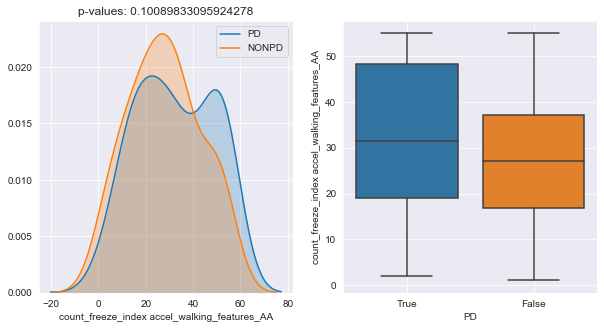

In [38]:
plot_distribution(male_walking_max_data[["count_freeze_index accel_walking_features_AA","PD"]])

## 2a. Walking Median Groupings Female

In [46]:
female_walking_median_data, female_walking_mean_data, female_walking_max_data, female_walking_min_data = aggregate_func(walking_data, "Female")

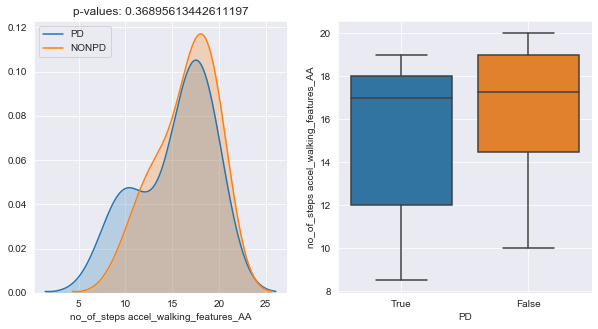

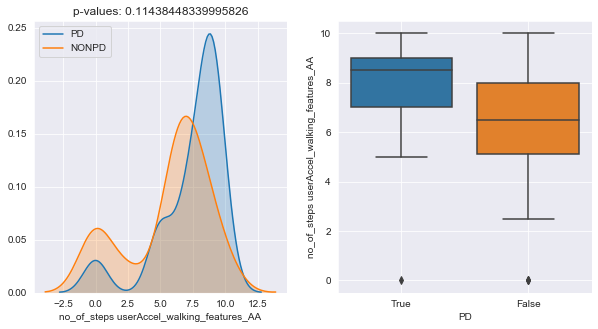

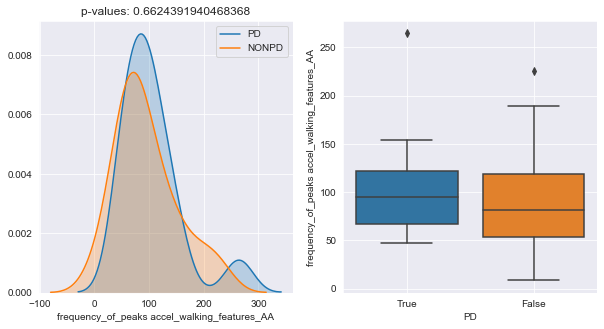

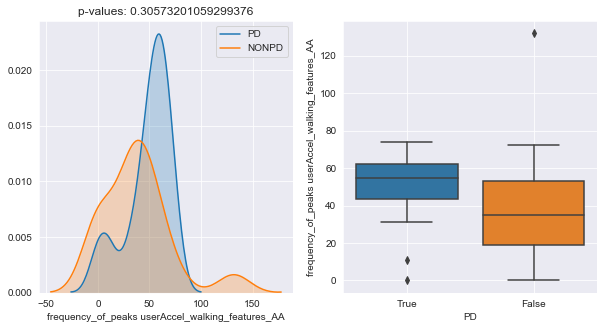

In [47]:
plot_distribution(female_walking_median_data[["no_of_steps accel_walking_features_AA", "no_of_steps userAccel_walking_features_AA",
                                            'frequency_of_peaks accel_walking_features_AA', "frequency_of_peaks userAccel_walking_features_AA", 
                                            "PD"]])

## 2b. Walking Median Groupings Female

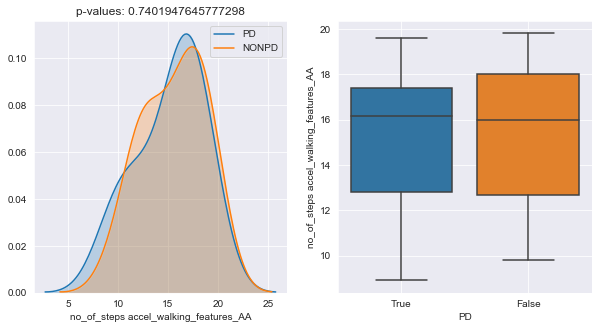

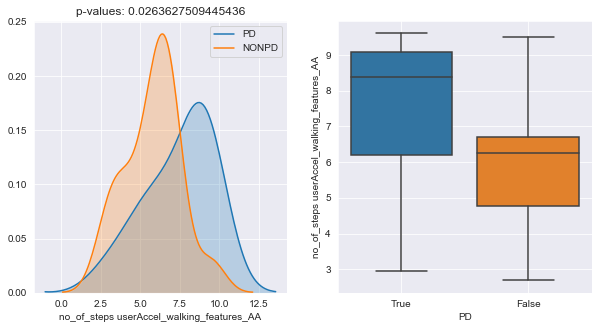

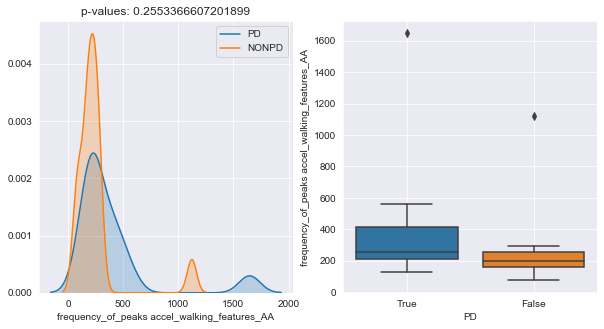

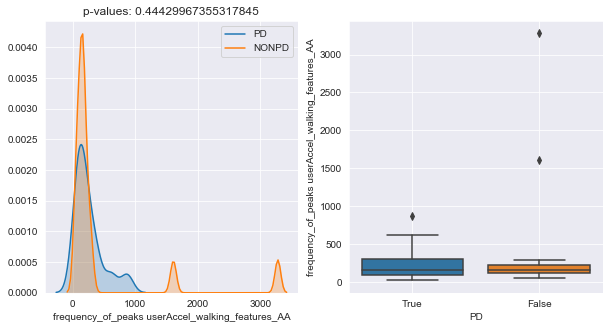

In [48]:
plot_distribution(female_walking_mean_data[["no_of_steps accel_walking_features_AA", "no_of_steps userAccel_walking_features_AA",
                                            'frequency_of_peaks accel_walking_features_AA', "frequency_of_peaks userAccel_walking_features_AA", 
                                            "PD"]])

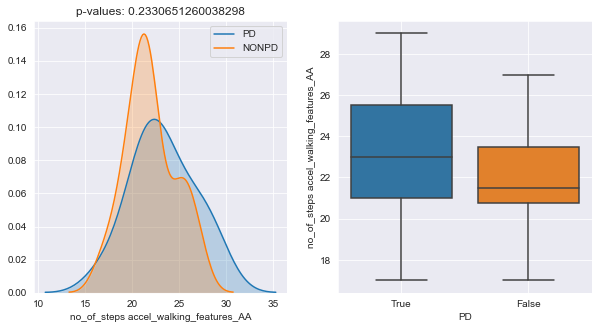

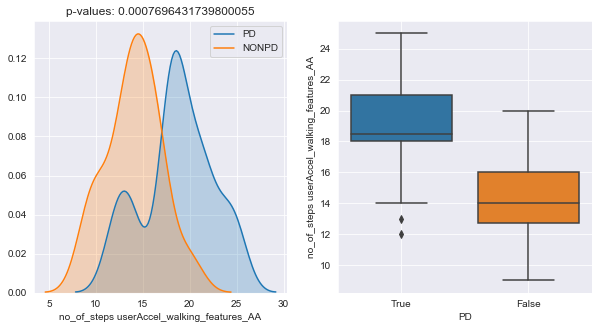

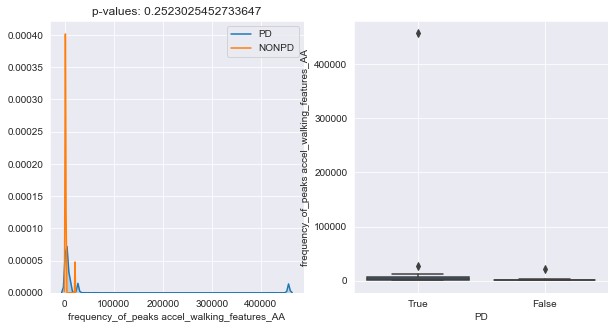

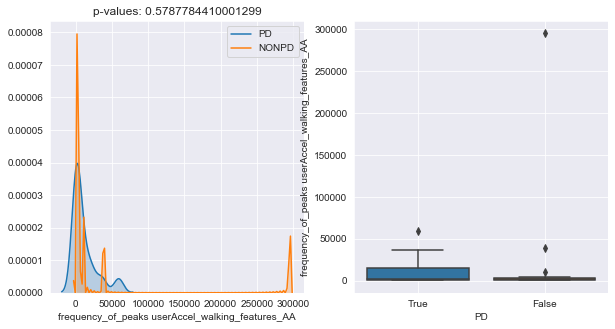

In [50]:
plot_distribution(female_walking_max_data[["no_of_steps accel_walking_features_AA", "no_of_steps userAccel_walking_features_AA",
                                            'frequency_of_peaks accel_walking_features_AA', "frequency_of_peaks userAccel_walking_features_AA", 
                                            "PD"]])